In [5]:
import sys

#sys.path.insert(0, 'backend_functions')

#import selection_functions as sf

import importlib

import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb

import awkward
import matplotlib.pyplot as plt
import pandas as pd

import ROOT
from ROOT import TH1F, TH2F, TDirectory, TH1D

from matplotlib import gridspec


In [6]:
ending = "Jan19b_noTune"

In [7]:
##Regular tune prior true and smearcept to be used


#prior true
#"nue_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_blockwise_recoCut_comb_"+ending+".csv"

In [8]:
####Load in noTune full event counts

nue_data_signal = pd.read_csv("nue_full_500_catsel_nopions_recoE_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", header=None)

nue_data_signal = nue_data_signal.values[:, 0]

print(nue_data_signal)
print("")

######

numu_data_signal = pd.read_csv("numu_full_500_catsel_nopions_recoE_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", header=None)

numu_data_signal = numu_data_signal.values[:, 0]

print(numu_data_signal)

[36.40261803 95.3835251  39.74491502 17.01811236  5.84955509  5.88084156]

[ 29.14033147 722.86457166 701.73846751 309.67021241 125.75800475
  83.17237279]


In [9]:
###Load in regular tune bkg event counts
#Include ext in bkg count here as the full event counts do

ending = "Jan19b" #need this ending as bkg is from regular tune



nue_bkg_inc_ext = pd.read_csv("nue_nopions_energy_usingSelection_comb_cv_nue_bkg_incExt_"+ending+".csv", header=None)

nue_bkg_inc_ext = nue_bkg_inc_ext.values[:, 0]

print(nue_bkg_inc_ext)
print("")

#######################

numu_bkg_inc_ext = pd.read_csv("numu_nopions_energy_usingSelection_comb_cv_numu_bkg_incExt_"+ending+".csv", header=None)

numu_bkg_inc_ext = numu_bkg_inc_ext.values[:, 0]

print(numu_bkg_inc_ext)
print("")

[18.76664423 37.45086691 13.30547888  7.30978266  1.92115632  2.9030358 ]

[ 11.81627631 285.60108619 269.63682435 135.03843215  55.72084381
  36.21829598]



In [10]:
####So then can calculate the data signal input to the unfolding

nue_datasig_bkg_subtracted = nue_data_signal - nue_bkg_inc_ext
print(nue_datasig_bkg_subtracted)
print("")

numu_datasig_bkg_subtracted = numu_data_signal - numu_bkg_inc_ext
print(numu_datasig_bkg_subtracted)

[17.63597381 57.93265818 26.43943614  9.70832971  3.92839877  2.97780575]

[ 17.32405515 437.26348546 432.10164316 174.63178026  70.03716093
  46.95407681]


In [11]:
nue_numu_tot = np.concatenate((nue_datasig_bkg_subtracted, numu_datasig_bkg_subtracted), axis=0)

print(nue_numu_tot)
print(len(nue_numu_tot))

[ 17.63597381  57.93265818  26.43943614   9.70832971   3.92839877
   2.97780575  17.32405515 437.26348546 432.10164316 174.63178026
  70.03716093  46.95407681]
12


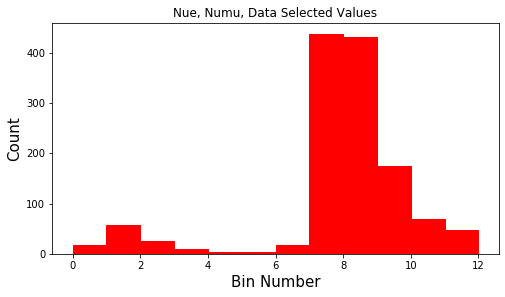

In [12]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])


#bins = np.arange(0, 10.5, 0.5)
#count = np.linspace(0.1, 9.6, 20)
bins = np.arange(0, 13, 1)
count = np.arange(0.0, 12.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_tot)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, Data Selected Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 1])

nue_numu_fig.savefig("data_signal_MC_noTune_input_recoE_comb_"+ending+".svg", bbox_inches='tight')

In [13]:
np.savetxt("data_signal_MC_noTune_input_recoE_comb_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')

print(ending)

Jan19b


In [14]:
####Now need to get in the uncertainties

###First up, get the noTune statistical uncertinaty. This will be from sig + bkg in noTune

ending = "Jan19b_noTune" 


nue_sig_unc = pd.read_csv("nue_total_noTune_err_squared_energy_comb_"+ending+".csv", header=None)

nue_sig_unc = nue_sig_unc.values[:, 0]

print(nue_sig_unc)
print("")

########################

numu_sig_unc = pd.read_csv("numu_total_noTune_err_squared_energy_comb_"+ending+".csv", header=None)

numu_sig_unc = numu_sig_unc.values[:, 0]

print(numu_sig_unc)
print("")

[5.52070994 7.92439931 1.37538739 1.08142727 0.15483605 0.47566146]

[  6.95957827 183.24889304 159.83069851  63.24880037  25.56631548
  16.81810419]



In [15]:
####The regular tune bkg stat uncertainties

ending = "Jan19b" #need this ending as bkg is from regular tune


nue_bkg_unc = pd.read_csv("nue_bkg_exp_err_squared_energy_comb_"+ending+".csv", header=None)

nue_bkg_unc = nue_bkg_unc.values[:, 0]

print(nue_bkg_unc)
print("")

########################

numu_bkg_unc = pd.read_csv("numu_bkg_exp_err_squared_energy_comb_"+ending+".csv", header=None)

numu_bkg_unc = numu_bkg_unc.values[:, 0]

print(numu_bkg_unc)
print("")

[5.57038553 8.66655139 1.10353238 0.87631698 0.09232464 0.43066448]

[  6.22796376 101.63198884  76.73040589  34.40373344  22.51917956
   7.77525029]



In [16]:
nue_stat_unc = nue_sig_unc + nue_bkg_unc
print(nue_stat_unc)
print("")

########################

numu_stat_unc = numu_sig_unc + numu_bkg_unc
print(numu_stat_unc)
print("")

#########################

nue_numu_tot_unc = np.concatenate((nue_stat_unc, numu_stat_unc), axis=0)

print(nue_numu_tot_unc)

[11.09109547 16.5909507   2.47891977  1.95774425  0.24716069  0.90632594]

[ 13.18754203 284.88088188 236.56110441  97.65253382  48.08549504
  24.59335449]

[1.10910955e+01 1.65909507e+01 2.47891977e+00 1.95774425e+00
 2.47160694e-01 9.06325943e-01 1.31875420e+01 2.84880882e+02
 2.36561104e+02 9.76525338e+01 4.80854950e+01 2.45933545e+01]


In [17]:
nue_numu_cov_stats   = np.zeros([(len(bins)-1), (len(bins)-1)])
print(nue_numu_cov_stats)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [18]:
nue_numu_cov_stats[np.diag_indices_from(nue_numu_cov_stats)]    = nue_numu_tot_unc

In [19]:
###Then sprinkle in the regular tune genie sys uncertainties

# Load in the blockwise genie cov matrix

blockwise_genie_err = pd.read_csv("blockwise_cov_genie_only_RecoE_comb_"+ending+".csv", header=None)

blockwise_genie_err = blockwise_genie_err.values
print(blockwise_genie_err)

[[2.47967230e+01 8.28828269e+01 4.09838586e+01 1.25762594e+01
  4.35533006e+00 4.27936219e+00 1.77134623e+01 5.06375279e+02
  5.61123880e+02 3.39068945e+02 1.05926005e+02 8.18387178e+01]
 [8.28828269e+01 3.52501713e+02 1.82837949e+02 5.19203605e+01
  1.76662393e+01 1.95280639e+01 5.73165810e+01 2.00149918e+03
  2.35457323e+03 1.56249415e+03 4.70237423e+02 3.55740031e+02]
 [4.09838586e+01 1.82837949e+02 9.73618013e+01 2.71407944e+01
  9.20847022e+00 1.03845382e+01 2.83841689e+01 1.02765809e+03
  1.23459545e+03 8.38533828e+02 2.51433534e+02 1.90294889e+02]
 [1.25762594e+01 5.19203605e+01 2.71407944e+01 8.48350804e+00
  2.78815504e+00 3.00163183e+00 8.40225706e+00 3.01653068e+02
  3.64971239e+02 2.35701704e+02 7.29689923e+01 5.53040768e+01]
 [4.35533006e+00 1.76662393e+01 9.20847022e+00 2.78815504e+00
  1.00791070e+00 1.02626822e+00 2.91096745e+00 1.03221823e+02
  1.23713412e+02 7.91869772e+01 2.46322298e+01 1.86399930e+01]
 [4.27936219e+00 1.95280639e+01 1.03845382e+01 3.00163183e+00
  1

In [20]:
# Load in the blockwise nuwrounisim cov matrix

nuWro_unisim = pd.read_csv("nuWro_extra_unisim_uncertainties_energy_comb_"+ending+".csv", header=None)

nuWro_unisim = nuWro_unisim.values
print(nuWro_unisim)

[[ 1.13420932e+01 -1.16469746e+01 -2.16173259e+01 -6.21272475e+00
  -3.27876733e+00 -5.84342966e+00  8.38473368e+01  2.19068527e+02
  -1.34282019e+02 -2.02666312e+01  1.40350059e+01  1.81768176e+00]
 [-1.16469746e+01  1.19600515e+01  2.21984110e+01  6.37972606e+00
   3.36690233e+00  6.00050412e+00 -8.61011973e+01 -2.24957204e+02
   1.37891590e+02  2.08114089e+01 -1.44122742e+01 -1.86654200e+00]
 [-2.16173259e+01  2.21984110e+01  4.12012818e+01  1.18410679e+01
   6.24912709e+00  1.11372143e+01 -1.59807821e+02 -4.17531019e+02
   2.55933196e+02  3.86269416e+01 -2.67498503e+01 -3.46438864e+00]
 [-6.21272475e+00  6.37972606e+00  1.18410679e+01  3.40307103e+00
   1.79597175e+00  3.20078661e+00 -4.59280676e+01 -1.19996586e+02
   7.35540793e+01  1.11012138e+01 -7.68778979e+00 -9.95650116e-01]
 [-3.27876733e+00  3.36690233e+00  6.24912709e+00  1.79597175e+00
   9.47824624e-01  1.68921608e+00 -2.42385514e+01 -6.33282338e+01
   3.88181872e+01  5.85866887e+00 -4.05723335e+00 -5.25454645e-01]
 [-5.

In [21]:
##### Now make the total cov matrix

total_noTune_input_cov = nue_numu_cov_stats + blockwise_genie_err + nuWro_unisim

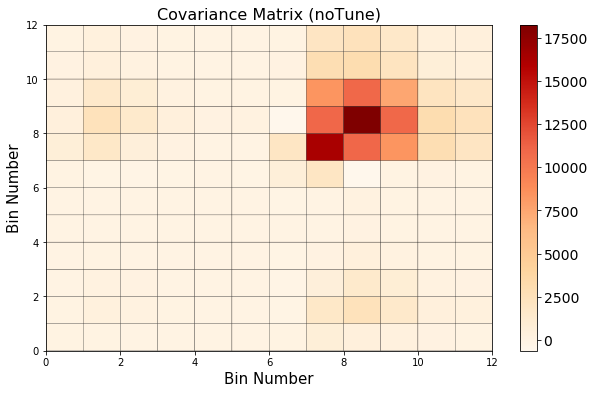

In [22]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_noTune_input_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("Bin Number", fontsize=15)
plt.ylabel("Bin Number", fontsize=15)

plt.title('Covariance Matrix (noTune)', fontsize=16)


plt.savefig("data_covmat_MC_noTune_input_recoE_comb_"+ending+".svg", bbox_inches='tight')

plt.show()

In [23]:
np.savetxt("data_covmat_MC_noTune_input_recoE_comb_"+ending+".csv", 
           total_noTune_input_cov,
           delimiter =", ", 
           fmt ='% s')

In [24]:
ending

'Jan19b'